In [1]:
import pickle
import pandas as pd
import sklearn
import numpy as np
import scanpy as sc
import scipy.sparse
import anndata
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import copy
import logging as logg
from sklearn import preprocessing
import os 
import warnings
import scATAcat
import seaborn as sns
import random as rn 

warnings.filterwarnings('ignore')

In [2]:
# set the seed for reproducibility
sd = 1234
np.random.seed(sd)
rn.seed(sd)
%env PYTHONHASHSEED=0


env: PYTHONHASHSEED=0


#### define necessary parameters

In [3]:
results_dir = "../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC/Fig1_SFig1-apply_scATAcat/apply_scATAcat_with_Corces2016_prototypes/"
output_dir = results_dir + "/outputs/"
figures_dir = results_dir + "/figures/"
data_dir = "../../../../../scATAcat_notebooks_for_paper/jan2024/data/"

for dir in [figures_dir, output_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)


### 0 - Load scATAC-seq data

In [4]:
ENCODE_coverage_per_cell_df= pickle.load(open(data_dir + 'Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_sparse.pkl','rb'))


In [5]:
pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_features.csv", index_col=0)

cCREs.1
cCREs                                         
chr1_181251_181601          chr1_181251_181601
chr1_190865_191071          chr1_190865_191071
chr1_778562_778912          chr1_778562_778912
chr1_779086_779355          chr1_779086_779355
chr1_779727_780060          chr1_779727_780060
...                                        ...
chrY_56842374_56842545  chrY_56842374_56842545
chrY_56844431_56844674  chrY_56844431_56844674
chrY_56857410_56857680  chrY_56857410_56857680
chrY_56857917_56858119  chrY_56857917_56858119
chrY_56868183_56868435  chrY_56868183_56868435

[926535 rows x 1 columns]

In [6]:
ENCODE_cCREs = pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_features.csv", index_col=0)
ENCODE_cCREs.index.name = None
ENCODE_cCREs.columns = ['cCREs']
ENCODE_cCREs.head()

cCREs
chr1_181251_181601  chr1_181251_181601
chr1_190865_191071  chr1_190865_191071
chr1_778562_778912  chr1_778562_778912
chr1_779086_779355  chr1_779086_779355
chr1_779727_780060  chr1_779727_780060

In [7]:
cell_IDs = pd.read_csv(data_dir +"Buenrostro2018_FACS_BM_scATAC/scATACseq/02_ENCODE_coverage_by_cell_matrix/scATAC_BM_Corces2018_ENCODE_coverage_per_cell_matrix_complete_cell_IDs.csv", index_col=0)
cell_IDs.index.name = None
cell_IDs.columns = ['cell_IDs']
cell_IDs.head()

cell_IDs
CLP_0    CLP_0
CLP_1    CLP_1
CMP_0    CMP_0
CMP_1    CMP_1
CMP_2    CMP_2

### 1 - initialize the AnnData object

In [8]:
sc_completeFeatures_adata = anndata.AnnData(ENCODE_coverage_per_cell_df.transpose().tocsr(), var=ENCODE_cCREs, obs=cell_IDs)


In [9]:
sc_completeFeatures_adata

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'

### 2 - add binary layer to AnnData

In [10]:
scATAcat.add_binary_layer(sc_completeFeatures_adata, binary_layer_key="binary")

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    layers: 'binary'

## 3- calculate & plot cell and feature statistics

In [11]:
scATAcat.cell_feature_statistics(sc_completeFeatures_adata, binary_layer_key ='binary')

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

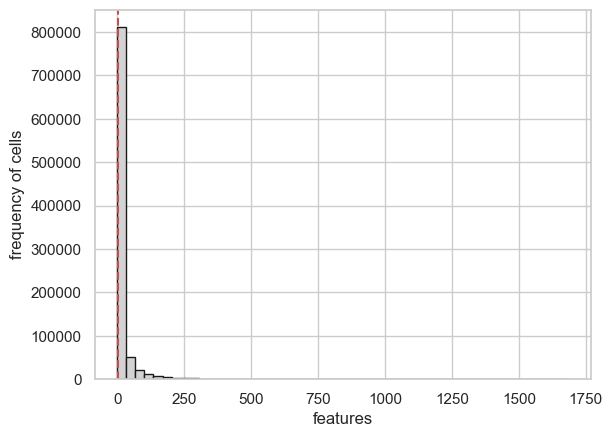

In [12]:
scATAcat.plot_feature_statistics(sc_completeFeatures_adata, threshold=3, bins=50, color="lightgrey", save=True, save_dir = figures_dir +"/feature_statistics_plot.png")

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

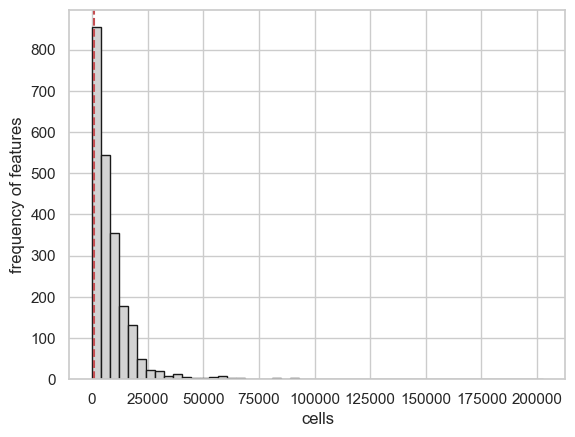

In [13]:
scATAcat.plot_cell_statistics(sc_completeFeatures_adata, threshold=1000, bins=50, color="lightgrey", save=True, save_dir = figures_dir + "/cell_statistics_plot.png")

## 4- filter the cells and features

In [14]:
sc_completeFeatures_adata

AnnData object with n_obs × n_vars = 2210 × 926535
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

In [15]:
sc_filteredFeatures_adata = scATAcat.preproces_sc_matrix(sc_completeFeatures_adata,cell_cutoff=1000,cell_cutoff_max=80000, feature_cutoff=3, remove_chrY = True, var_key = 'cCREs', copy=True)

In [16]:
sc_filteredFeatures_adata

View of AnnData object with n_obs × n_vars = 1872 × 501699
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary'

#### note that here we filtered almost half of the features!

### 5- load & preprocess the bulk data

In [17]:
bulk_by_ENCODE_peaks_df_annotated =  pickle.load(open(data_dir + "Corces2016_bulk_ATAC/02_ENCODE_coverage_by_prototypes_matrix/Corces2016bulkATAC_ENCODE_cCRE_overlappingPeaks_annotated.pkl", 'rb'))
bulk_by_ENCODE_peaks_df_annotated = bulk_by_ENCODE_peaks_df_annotated.reindex(sorted(bulk_by_ENCODE_peaks_df_annotated.columns), axis=1)

In [18]:
bulk_by_ENCODE_peaks_df_annotated.columns

Index(['Bcell_1', 'Bcell_2', 'Bcell_3', 'Bcell_4', 'CD34_Bone_Marrow_1',
       'CD34_Bone_Marrow_2', 'CD34_Cord_Blood_1', 'CD4Tcell_1', 'CD4Tcell_2',
       'CD4Tcell_3', 'CD4Tcell_4', 'CD4Tcell_5', 'CD8Tcell_1', 'CD8Tcell_2',
       'CD8Tcell_3', 'CD8Tcell_4', 'CD8Tcell_5', 'CLP_1', 'CLP_2', 'CLP_3',
       'CLP_4', 'CLP_5', 'CMP_1', 'CMP_2', 'CMP_3', 'CMP_4', 'CMP_5', 'CMP_6',
       'CMP_7', 'CMP_8', 'Ery_1', 'Ery_2', 'Ery_3', 'Ery_4', 'Ery_5', 'Ery_6',
       'Ery_7', 'Ery_8', 'GMP_1', 'GMP_2', 'GMP_3', 'GMP_4', 'GMP_5', 'GMP_6',
       'GMP_7', 'HSC_1', 'HSC_2', 'HSC_3', 'HSC_4', 'HSC_5', 'HSC_6', 'HSC_7',
       'LMPP_1', 'LMPP_2', 'LMPP_3', 'MEP_1', 'MEP_2', 'MEP_3', 'MEP_4',
       'MEP_5', 'MEP_6', 'MEP_7', 'MPP_1', 'MPP_2', 'MPP_3', 'MPP_4', 'MPP_5',
       'MPP_6', 'Mono_1', 'Mono_2', 'Mono_3', 'Mono_4', 'Mono_5', 'Mono_6',
       'NKcell_1', 'NKcell_2', 'NKcell_3', 'NKcell_4', 'NKcell_5', 'NKcell_6'],
      dtype='object')

In [19]:
# subset to progenitors:
bulk_by_ENCODE_peaks_df_annotated = bulk_by_ENCODE_peaks_df_annotated[['CLP_1', 'CLP_2', 'CLP_3',
       'CLP_4', 'CLP_5', 'CMP_1', 'CMP_2', 'CMP_3', 'CMP_4', 'CMP_5', 'CMP_6',
       'CMP_7', 'CMP_8', 'GMP_1', 'GMP_2', 'GMP_3', 'GMP_4', 'GMP_5', 'GMP_6',
       'GMP_7', 'HSC_1', 'HSC_2', 'HSC_3', 'HSC_4', 'HSC_5', 'HSC_6', 'HSC_7',
       'LMPP_1', 'LMPP_2', 'LMPP_3', 'MEP_1', 'MEP_2', 'MEP_3', 'MEP_4',
       'MEP_5', 'MEP_6', 'MEP_7', 'MPP_1', 'MPP_2', 'MPP_3', 'MPP_4', 'MPP_5',
       'MPP_6']]

In [20]:
bulk_by_ENCODE_peaks_df_annotated

CLP_1  CLP_2  CLP_3  CLP_4  CLP_5  CMP_1  CMP_2  \
chr1_181251_181601          0      5      0      0      0      0      1   
chr1_190865_191071          0      0      0      0      0      0      0   
chr1_778562_778912         72     94     78     64     23     96     83   
chr1_779086_779355         11     10     10      9      0     12     15   
chr1_779727_780060          4      4      2      0      0      0      1   
...                       ...    ...    ...    ...    ...    ...    ...   
chrY_56842374_56842545      5     12      4      1      0      0      1   
chrY_56844431_56844674     10     13      2      0      0      0      0   
chrY_56857410_56857680      4      9      0      0      0      0      0   
chrY_56857917_56858119      6      9      5      0      0      0      0   
chrY_56868183_56868435      2      4      1      0      0      2      0   

                        CMP_3  CMP_4  CMP_5  ...  MEP_4  MEP_5  MEP_6  MEP_7  \
chr1_181251_181601          9      7      3  ...      3      4      7     10   
chr1_190865_191071          0      0      0  ...      0      1      0      0   
chr1_778562_778912        192    115     84  ...     58     84    291    252   
chr1_779086_779355         16     19      8  ...      8     11     34     33   
chr1_779727_780060          3      0      0  ...      2      5      7      4   
...                       ...    ...    ...  ...    ...    ...    ...    ...   
chrY_56842374_56842545      0      1      4  ...      3      1     10      3   
chrY_56844431_56844674      0      1      5  ...      2      3      3      1   
chrY_56857410_56857680      3      1      0  ...      2      5      2      4   
chrY_56857917_56858119      0      1      0  ...      6      1      0      4   
chrY_56868183_56868435      0      0      2  ...      1      0      1      0   

                        MPP_1  MPP_2  MPP_3  MPP_4  MPP_5  MPP_6  
chr1_181251_181601          0      4      1      2      5     10  
chr1_190865_191071          0      0      0      0      0      0  
chr1_778562_778912         96    193    131     52    268    420  
chr1_779086_779355         13     20      9      7     43     72  
chr1_779727_780060          0      1      2      0      5      8  
...                       ...    ...    ...    ...    ...    ...  
chrY_56842374_56842545      1      1      8      3      2      6  
chrY_56844431_56844674      1      1      7      5      2      0  
chrY_56857410_56857680      1      0      2      5      0      1  
chrY_56857917_56858119      4      0      2      6      4      0  
chrY_56868183_56868435      0      0      3      2      1      1  

[926535 rows x 43 columns]

In [21]:
bulk_completeFeatures_adata = scATAcat.generate_bulk_sparse_AnnData(bulk_by_ENCODE_peaks_df_annotated)

In [22]:
bulk_completeFeatures_adata

AnnData object with n_obs × n_vars = 43 × 926535
    obs: 'cell_types'
    var: 'cCREs'

In [23]:
bulk_completeFeatures_adata = scATAcat.preprocess_bulk_adata(bulk_completeFeatures_adata, remove_chrY=True, var_key = 'cCREs', copy=False)

### 6 - Overlap bulk and sc features

- before we proceed with sc analysis, we need to overlap the features:
    - we don't want the feature that does not have any counts in bulk data to influence clustering
    - similarly, we want the projection to be defined only with the same feature set

In [24]:
sc_bulk_common_vars = scATAcat.overlap_vars(sc_filteredFeatures_adata, bulk_completeFeatures_adata)

In [25]:
len(sc_bulk_common_vars)

501699

In [26]:
sc_commonFeatures_adata = scATAcat.subset_adata_vars(sc_filteredFeatures_adata, vars_list=sc_bulk_common_vars, copy_=True)


In [27]:
bulk_commonFeatures_adata = scATAcat.subset_adata_vars(bulk_completeFeatures_adata, vars_list=sc_bulk_common_vars, copy_=True)


### 7- doublet removal. As the data is genetated with sorted single cells, we did not perform doublet removal

### 8- apply TF-IDF

In [28]:
scATAcat.apply_TFIDF_sparse(sc_commonFeatures_adata, binary_layer_key='binary', TFIDF_key='TF_logIDF' )

AnnData object with n_obs × n_vars = 1872 × 501699
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary', 'TF_logIDF'

### 9 - subset matrices to differential cCREs

In [29]:
pairwise_top2000_cCREs = pd.read_table('../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/Corces2016_pairwise_differential_cCREs_FDR0.05_top2000_sorted_exactCREs.csv',delimiter="\t",header=None)

pairwise_top2000_cCREs.head()

0
0  chr1_1842820_1843169
1  chr1_1895700_1895891
2  chr1_1895944_1896292
3  chr1_1966481_1966686
4  chr1_2045674_2045954

In [30]:
len(pairwise_top2000_cCREs)

21034

In [31]:
common_differential_vars = list(set(list(sc_bulk_common_vars)) & set(list(pairwise_top2000_cCREs[0].tolist())))

len(common_differential_vars)

19412

In [32]:
bulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(bulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

In [33]:
sc_commonDiffFeatures_adata = scATAcat.subset_adata_vars(sc_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

### 10- dimention reduction and clustering 

In [34]:
sc_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 1872 × 19412
    obs: 'cell_IDs'
    var: 'cCREs'
    obsm: 'num_feature_per_cell'
    varm: 'num_cell_per_feature'
    layers: 'binary', 'TF_logIDF'

In [35]:
scATAcat.apply_PCA(sc_commonDiffFeatures_adata, layer_key ='TF_logIDF', svd_solver='arpack', random_state=0)


AnnData object with n_obs × n_vars = 1872 × 19412
    obs: 'cell_IDs'
    var: 'cCREs'
    uns: 'pca'
    obsm: 'num_feature_per_cell', 'X_pca'
    varm: 'num_cell_per_feature', 'PCs'
    layers: 'binary', 'TF_logIDF'

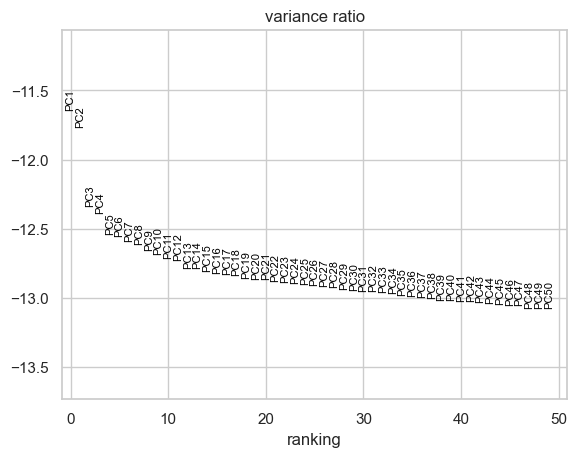

In [36]:
with plt.rc_context():
    sc.pl.pca_variance_ratio(sc_commonDiffFeatures_adata, n_pcs=50, log=True, show=False)
    plt.savefig(figures_dir + "/pca_variance_ratio.pdf", bbox_inches="tight")

In [37]:
sc.pp.neighbors(sc_commonDiffFeatures_adata, n_pcs = 50, n_neighbors = 30, random_state=0)


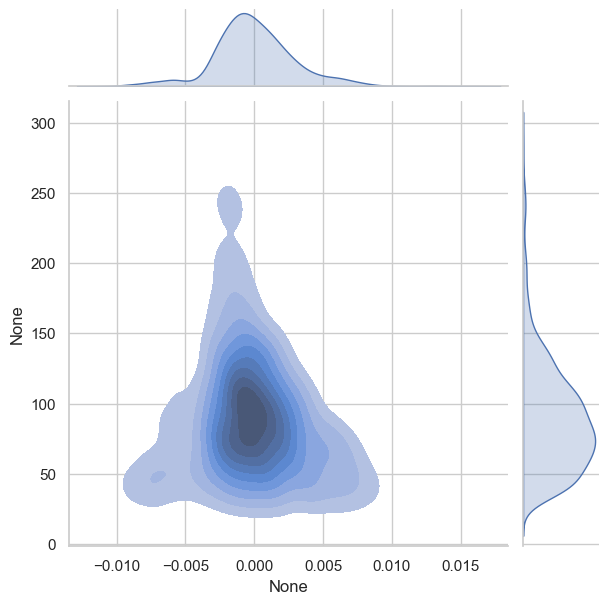

In [38]:
seqDepth_PC1_plot = sns.jointplot(
    x=sc_commonDiffFeatures_adata.obsm['X_pca'][:,0],
    y=np.sqrt(sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']),
    kind="kde",fill=True
)

Text(0, 0.5, 'num_feature_per_cell')

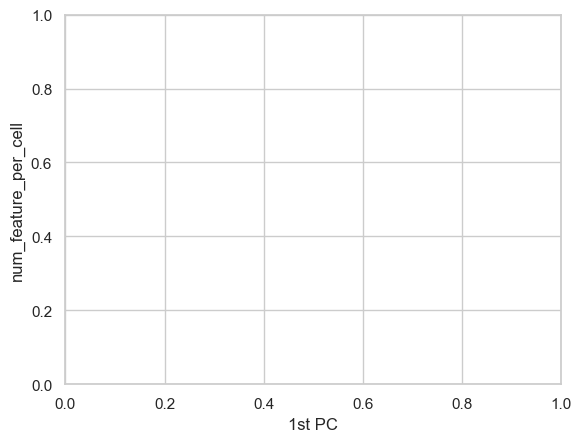

In [39]:
## correlation
np.corrcoef(sc_commonDiffFeatures_adata.obsm['X_pca'][:,0],
    np.sqrt(sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']))
plt.xlabel("1st PC")
plt.ylabel("num_feature_per_cell")

### 11 -  apply UMAP & leiden clustering

In [40]:
leiden_resolution=1.0
leiden_key="leiden_"+ str(leiden_resolution)

In [41]:
sc.tl.umap(sc_commonDiffFeatures_adata, random_state=0)

In [42]:
sc.tl.leiden(sc_commonDiffFeatures_adata, resolution=leiden_resolution,key_added=leiden_key, random_state=0)

In [43]:
# specifiy the colors implicity for paper
sc_commonDiffFeatures_adata.uns[leiden_key +'_colors'] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

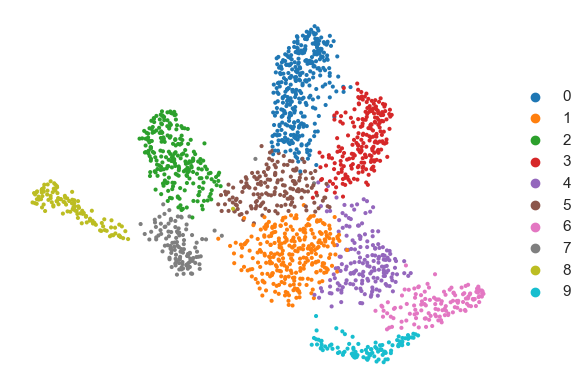

In [44]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata, color=leiden_key, show=False,size=35 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir + "/"+ leiden_key+ ".pdf", bbox_inches="tight")

In [45]:
# add cell types as obs
sc_commonDiffFeatures_adata.obs["cell_type"] = [r.split('_')[0] for r in sc_commonDiffFeatures_adata.obs.cell_IDs]
sc_commonDiffFeatures_adata.obs

cell_IDs leiden_1.0 cell_type
CLP_1      CLP_1          8       CLP
CMP_0      CMP_0          4       CMP
CMP_1      CMP_1          4       CMP
CMP_2      CMP_2          1       CMP
CMP_3      CMP_3          6       CMP
...          ...        ...       ...
LMPP_90  LMPP_90          7      LMPP
LMPP_91  LMPP_91          7      LMPP
LMPP_93  LMPP_93          7      LMPP
LMPP_94  LMPP_94          7      LMPP
LMPP_95  LMPP_95          7      LMPP

[1872 rows x 3 columns]

In [46]:
# manually set new colors # E4E858
sc_commonDiffFeatures_adata.uns['cell_type_colors'] =['#82018F',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"]

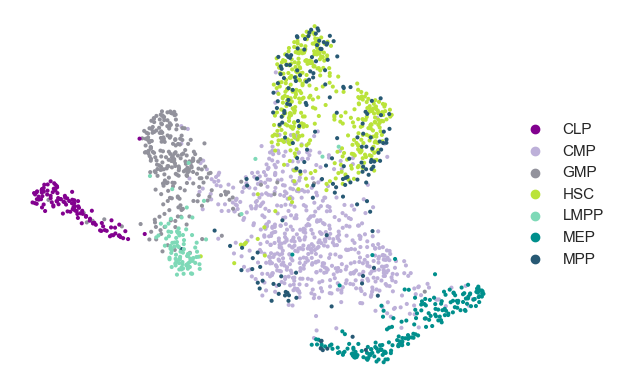

In [47]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='cell_type', add_outline=False, frameon=False,title ="", show=False, size=35 )
    plt.savefig(figures_dir + "/cell_types_umap_matching_colors.pdf", bbox_inches="tight")

#### loook at sequencing depth

In [48]:
sc_commonDiffFeatures_adata.obs['num_feature_per_cell_'] = sc_commonDiffFeatures_adata.obsm['num_feature_per_cell']

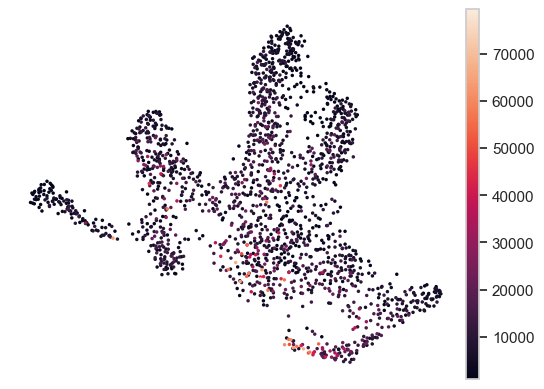

<Figure size 640x480 with 0 Axes>

In [49]:

with plt.rc_context():  
    sc.pl.umap(sc_commonDiffFeatures_adata, color='num_feature_per_cell_', add_outline=False, frameon=False,title ="", save=False, size=25 )
    plt.savefig(figures_dir + "/seq_depth_umap.pdf", bbox_inches="tight")

### 12 - from pseudobulks according to the cluster assignments


In [50]:
cell_cluster_assignments = pd.DataFrame(sc_commonDiffFeatures_adata.obs[leiden_key].copy())
cell_cluster_assignments


leiden_1.0
CLP_1            8
CMP_0            4
CMP_1            4
CMP_2            1
CMP_3            6
...            ...
LMPP_90          7
LMPP_91          7
LMPP_93          7
LMPP_94          7
LMPP_95          7

[1872 rows x 1 columns]

In [51]:
cell_cluster_sizes = pd.DataFrame(cell_cluster_assignments[leiden_key].value_counts())
cell_cluster_sizes['leiden_clusters'] = cell_cluster_sizes.index
cell_cluster_sizes.head()

count leiden_clusters
leiden_1.0                       
0             344               0
1             286               1
2             233               2
3             212               3
4             174               4

In [52]:
for clust_id in set(sc_commonDiffFeatures_adata.obs[leiden_key].values):
    clust_df= sc_commonDiffFeatures_adata[sc_commonDiffFeatures_adata.obs[leiden_key]==clust_id]

In [53]:
cell_types = ([(r.split('_')[0]) for r in clust_df.obs[leiden_key].index])

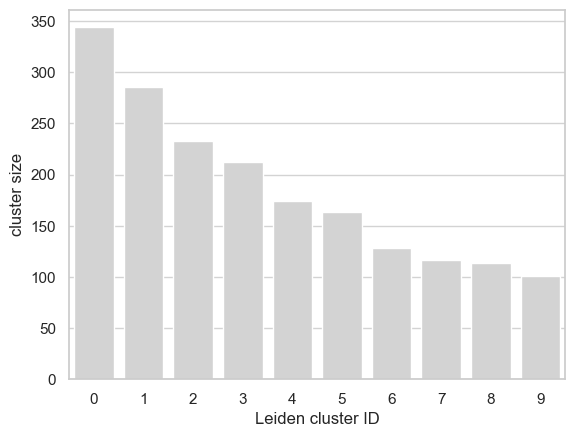

In [54]:
# plot a bar chart
sns.set_style("whitegrid")
ax= sns.barplot(
    y="count", 
    x="leiden_clusters", 
    data=cell_cluster_sizes, 
    color='lightgrey');
ax.yaxis.grid(True,color="lightgrey")
ax.axes.set_xlabel("Leiden cluster ID")
ax.axes.set_ylabel("cluster size")
#atickt(yticks=(list(range(0,1500,100))))
plt.savefig(figures_dir + "/cluster_sizes_"+leiden_key+".pdf", dpi=250)

In [55]:
pseudobulk_commonFeatures_adata = scATAcat.generate_bulk_sparse_AnnData(scATAcat.get_pseudobulk_matrix_ext(adata_to_subset=sc_commonFeatures_adata, adata_to_get_clusters=sc_commonDiffFeatures_adata, cluster_key=leiden_key  ,method = 'sum'))

In [56]:
scATAcat.preprocessing_libsize_norm_log2(pseudobulk_commonFeatures_adata)

AnnData object with n_obs × n_vars = 10 × 501699
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

In [57]:
scATAcat.preprocessing_libsize_norm_log2(bulk_commonFeatures_adata)

AnnData object with n_obs × n_vars = 43 × 501699
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

### 13 - Projection


#### processing 

In [58]:
bulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(bulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

In [59]:
bulk_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 43 × 19412
    obs: 'cell_types'
    var: 'cCREs'
    layers: 'libsize_norm_log2'

In [60]:
pseudobulk_commonDiffFeatures_adata = scATAcat.subset_adata_vars(pseudobulk_commonFeatures_adata,
                                                 vars_list=common_differential_vars,
                                                 copy_=True)

In [61]:
scATAcat.preprocessing_standardization(bulk_commonDiffFeatures_adata, input_layer_key="libsize_norm_log2", zero_center=True)

adding std with default keywords
adding mean with default keywords


AnnData object with n_obs × n_vars = 43 × 19412
    obs: 'cell_types'
    var: 'cCREs', 'feature_std', 'feature_mean'
    layers: 'libsize_norm_log2', 'libsize_norm_log2_std'

In [62]:
bulk_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 43 × 19412
    obs: 'cell_types'
    var: 'cCREs', 'feature_std', 'feature_mean'
    layers: 'libsize_norm_log2', 'libsize_norm_log2_std'

In [63]:
scATAcat.preprocessing_standardization(pseudobulk_commonDiffFeatures_adata, input_layer_key="libsize_norm_log2", zero_center=False,
                              output_layer_key= "libsize_norm_log2_bulk_scaled_diff",
                              std_key= None,  mean_key=None,
                              std_ = bulk_commonDiffFeatures_adata.var["feature_std"],
                              mean_= bulk_commonDiffFeatures_adata.var["feature_mean"])

adding std with default keywords
adding mean with default keywords


AnnData object with n_obs × n_vars = 10 × 19412
    obs: 'cell_types'
    var: 'cCREs', 'feature_std', 'feature_mean'
    layers: 'libsize_norm_log2', 'libsize_norm_log2_bulk_scaled_diff'

In [64]:
## as an option, I can add the color codes from the clustering/ sc adata as a paramater for the pseudobulk matrix 
leiden_color_key = leiden_key+"_colors"
pseudobulk_commonDiffFeatures_adata.uns[leiden_color_key] = sc_commonDiffFeatures_adata.uns[leiden_color_key]

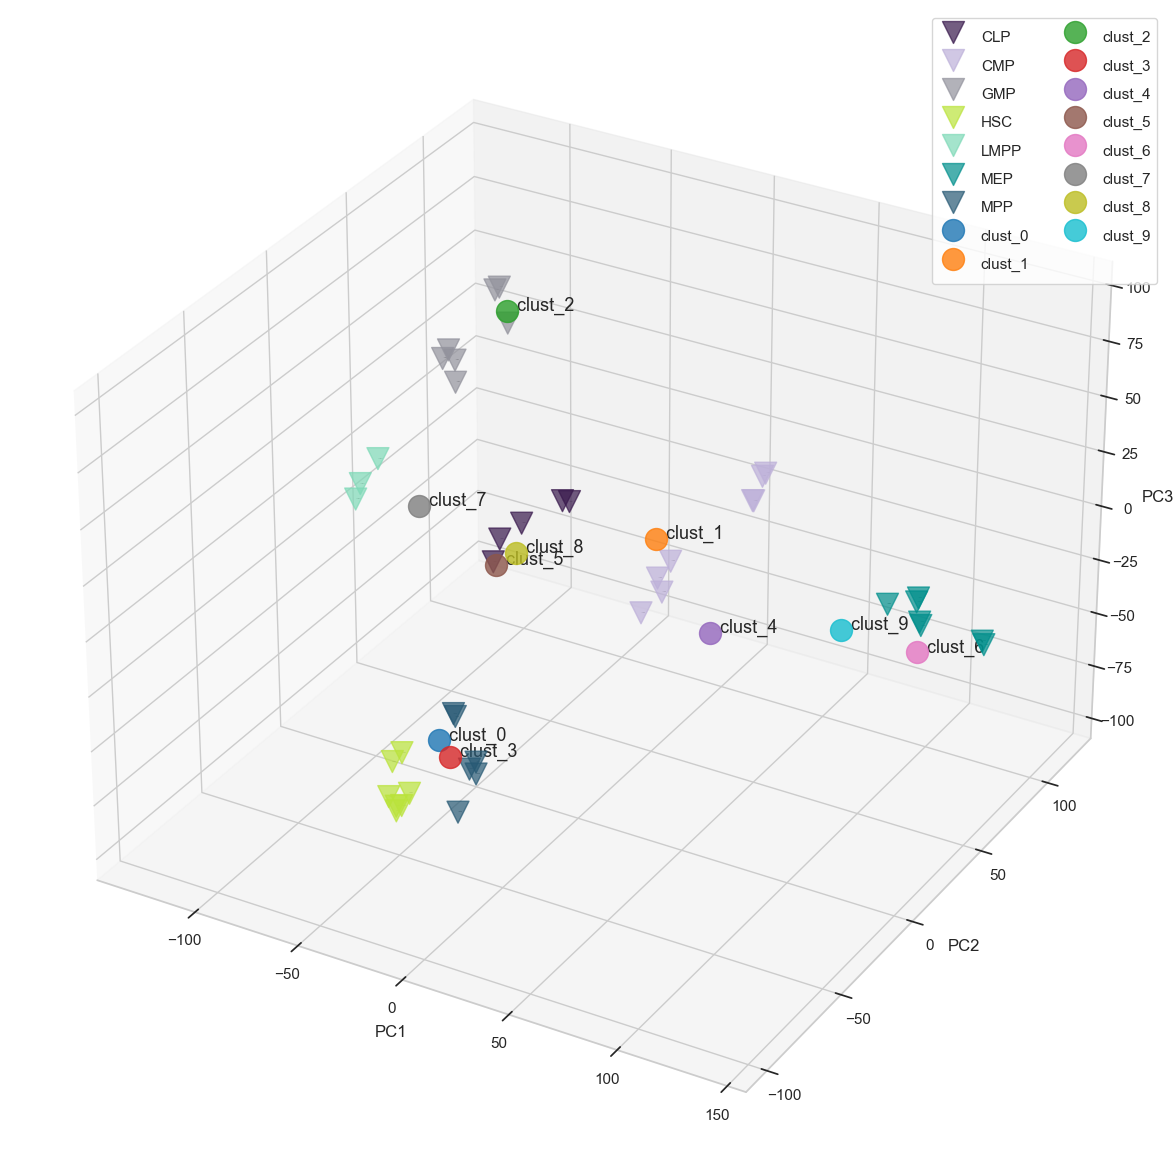

In [65]:
result= scATAcat.projection(prototype_adata=bulk_commonDiffFeatures_adata, pseudobulk_adata=pseudobulk_commonDiffFeatures_adata, prototype_layer_key = "libsize_norm_log2_std", pseudobulk_layer_key="libsize_norm_log2_bulk_scaled_diff", color_key=leiden_color_key, pseudobulk_label_font_size =13, prototype_label_font_size = 0,
prototype_colors = ['#38184C',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"], pseudobulk_colors =  None, pseudobulk_point_size=250, prototype_point_size=250, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, cmap='twilight_shifted', prototype_legend = True, pseudobulk_legend = True, save_path = figures_dir + "projection.png")

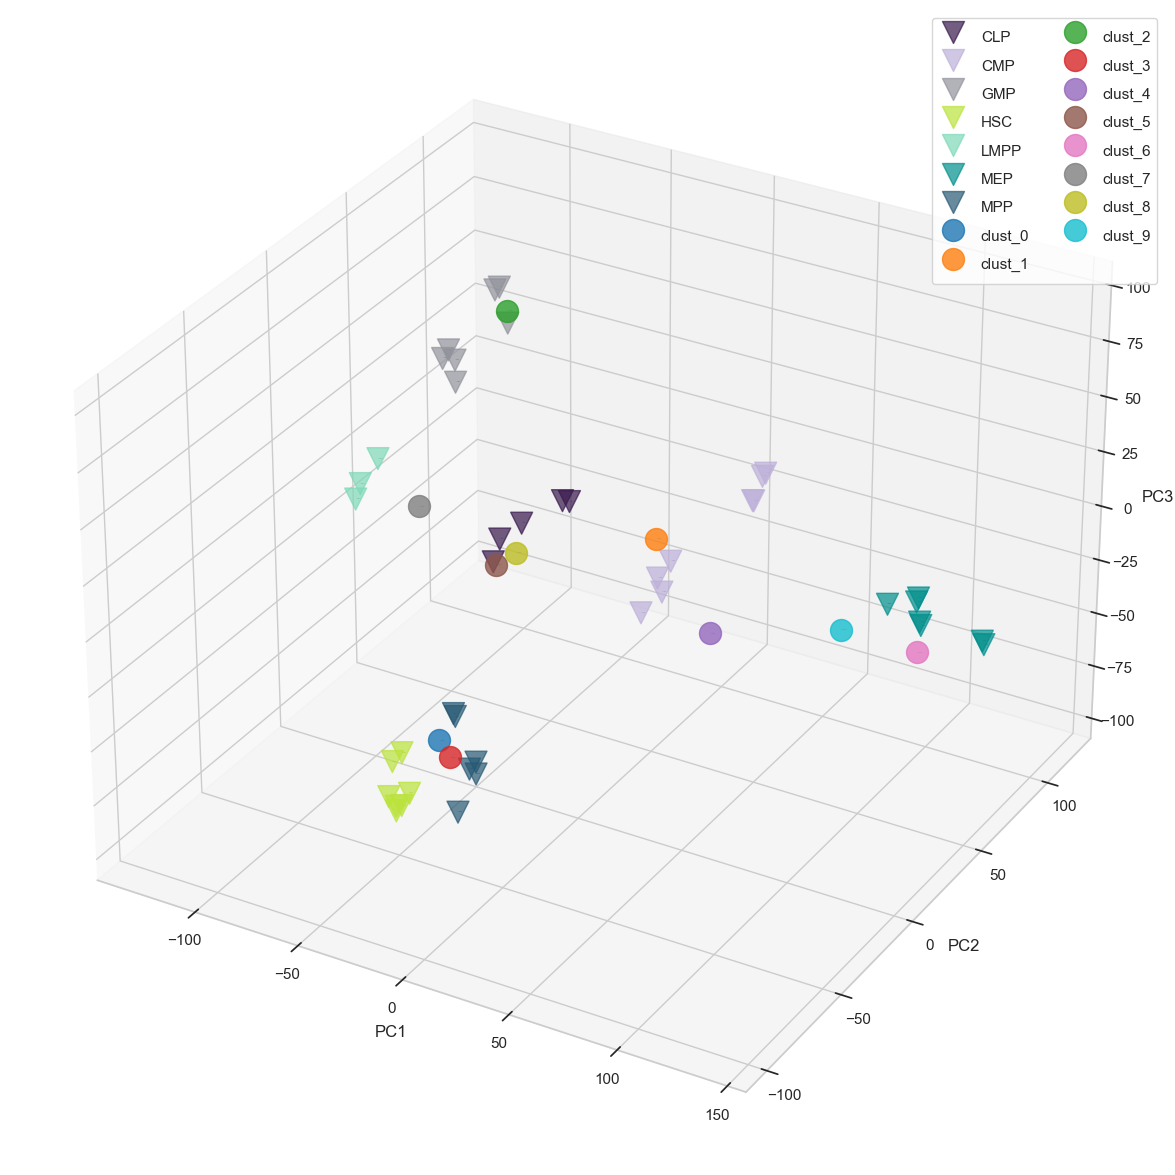

In [66]:
result_noLabel = scATAcat.projection(prototype_adata=bulk_commonDiffFeatures_adata, pseudobulk_adata=pseudobulk_commonDiffFeatures_adata, prototype_layer_key = "libsize_norm_log2_std", pseudobulk_layer_key="libsize_norm_log2_bulk_scaled_diff", color_key=leiden_color_key, pseudobulk_label_font_size =0, prototype_label_font_size =0, 
                            prototype_colors = ['#38184C',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"], pseudobulk_colors =  None, pseudobulk_point_size=250, prototype_point_size=250, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, cmap='twilight_shifted', prototype_legend = True, pseudobulk_legend = True, save_path = figures_dir + "projection_noLabel.png")

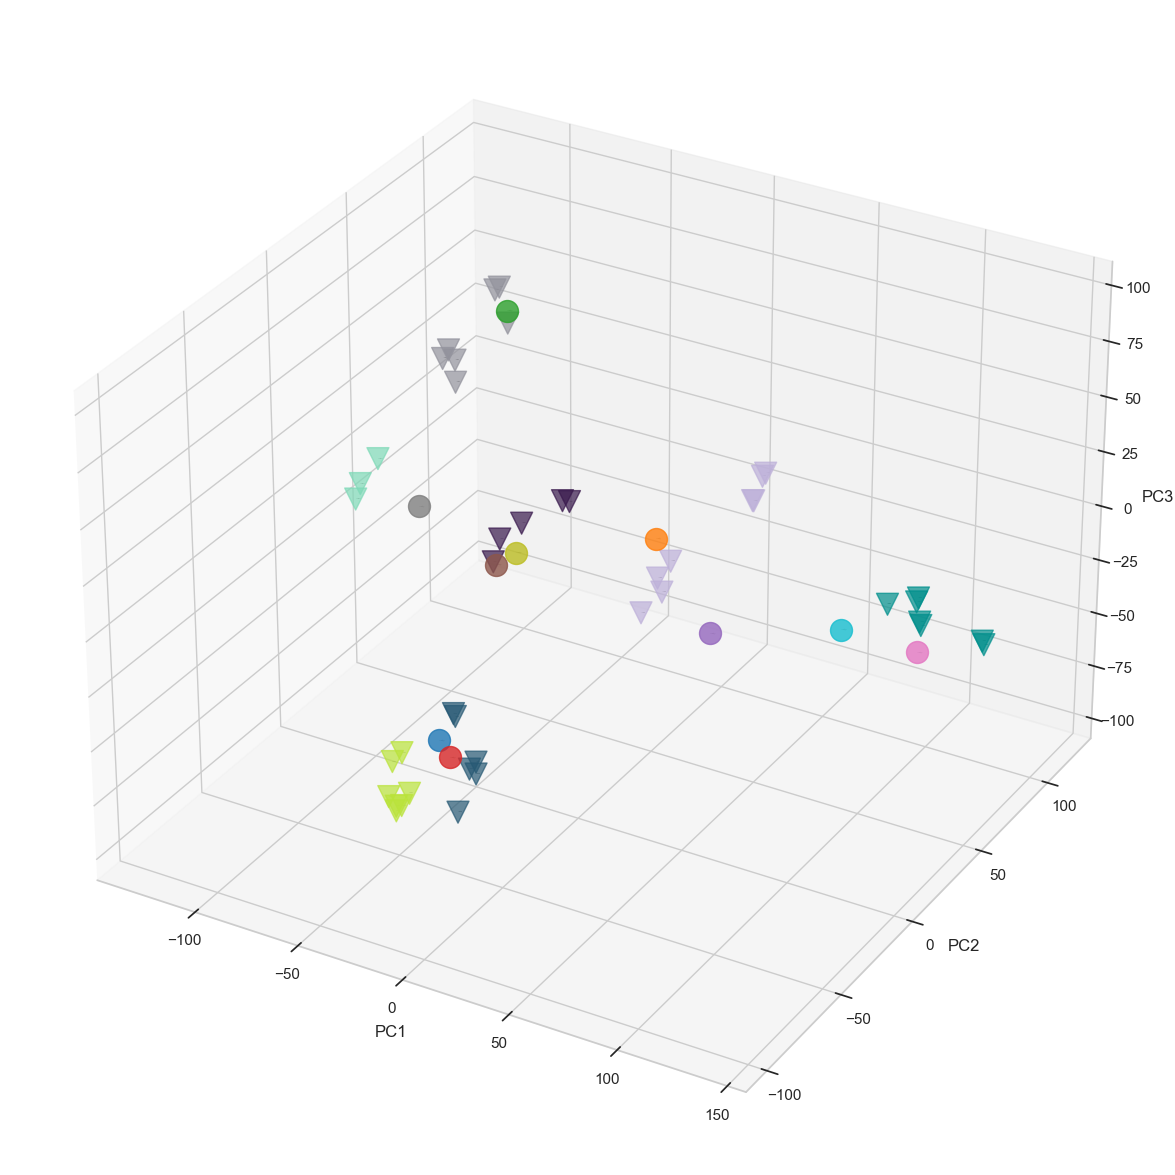

In [67]:
result_noLabel_noLegend = scATAcat.projection(prototype_adata=bulk_commonDiffFeatures_adata, pseudobulk_adata=pseudobulk_commonDiffFeatures_adata, prototype_layer_key = "libsize_norm_log2_std", pseudobulk_layer_key="libsize_norm_log2_bulk_scaled_diff", color_key=leiden_color_key, pseudobulk_label_font_size =0, prototype_label_font_size =0, 
                            prototype_colors = ['#38184C',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"], pseudobulk_colors =  None, pseudobulk_point_size=250, prototype_point_size=250, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, cmap='twilight_shifted', prototype_legend = False, pseudobulk_legend = False, save_path = figures_dir + "projection_noLabel_noLegend.png", fig_size_inches=(15,15))


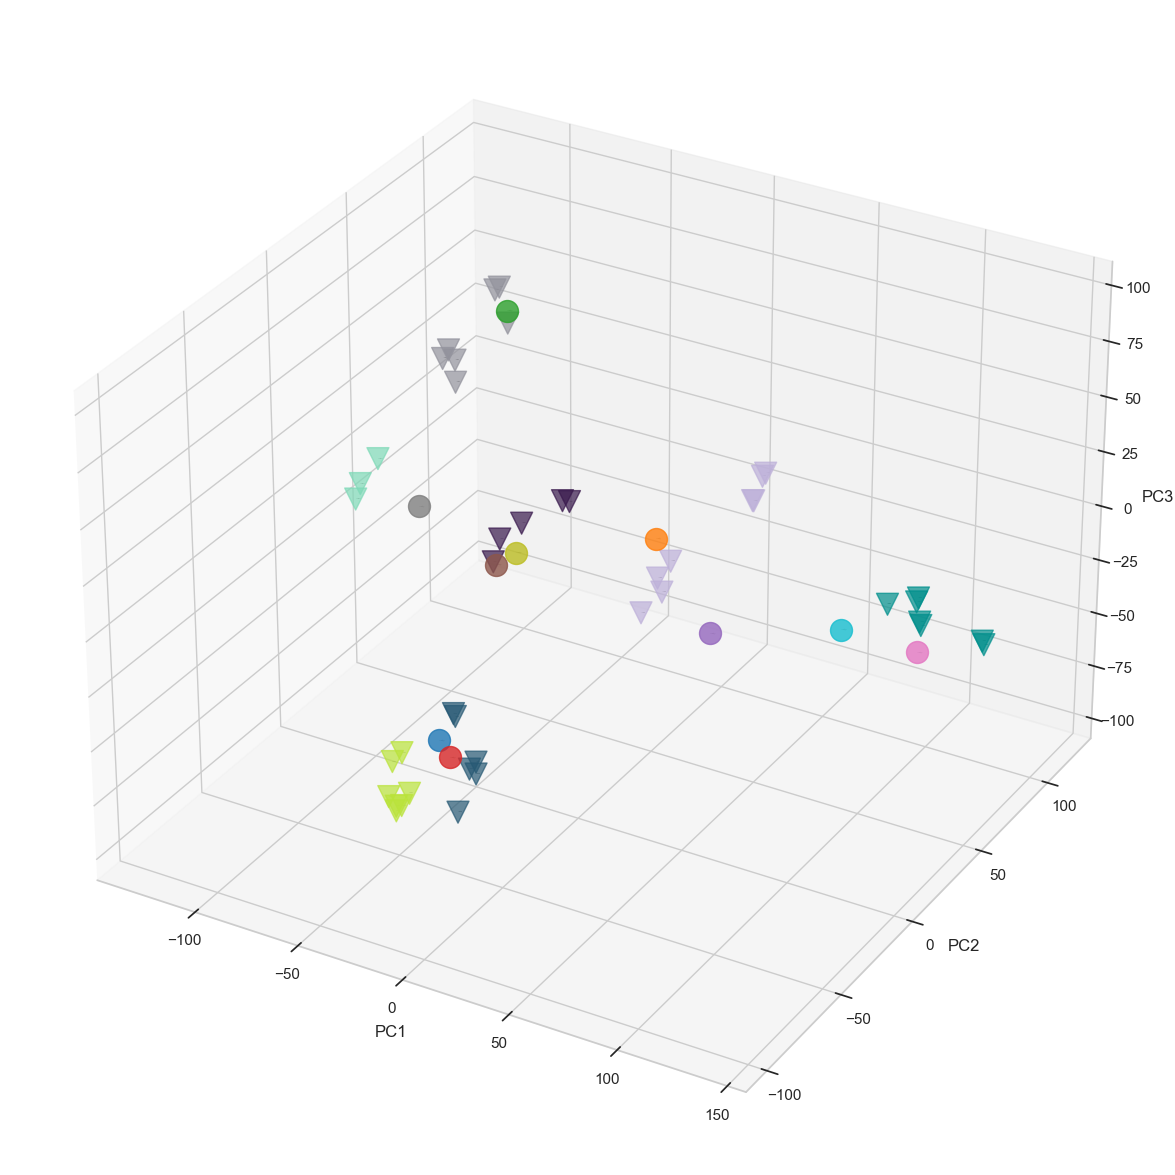

In [68]:
result_noLabel_noLegend = scATAcat.projection(prototype_adata=bulk_commonDiffFeatures_adata, pseudobulk_adata=pseudobulk_commonDiffFeatures_adata, prototype_layer_key = "libsize_norm_log2_std", pseudobulk_layer_key="libsize_norm_log2_bulk_scaled_diff", color_key=leiden_color_key, pseudobulk_label_font_size =0, prototype_label_font_size =0, 
                            prototype_colors = ['#38184C',  "#BDB0D9", "#92929C","#BAE33A", "#7ED9B7", "#008F8C", "#275974"], pseudobulk_colors =  None, pseudobulk_point_size=250, prototype_point_size=250, pseudobulk_point_alpha=0.8, prototype_point_alpha=0.7, cmap='twilight_shifted', prototype_legend = False, pseudobulk_legend = False, save_path = figures_dir + "projection_noLabel_noLegend.pdf", fig_size_inches=(15,15))


### 14 - Assign annotatiosn to clusters


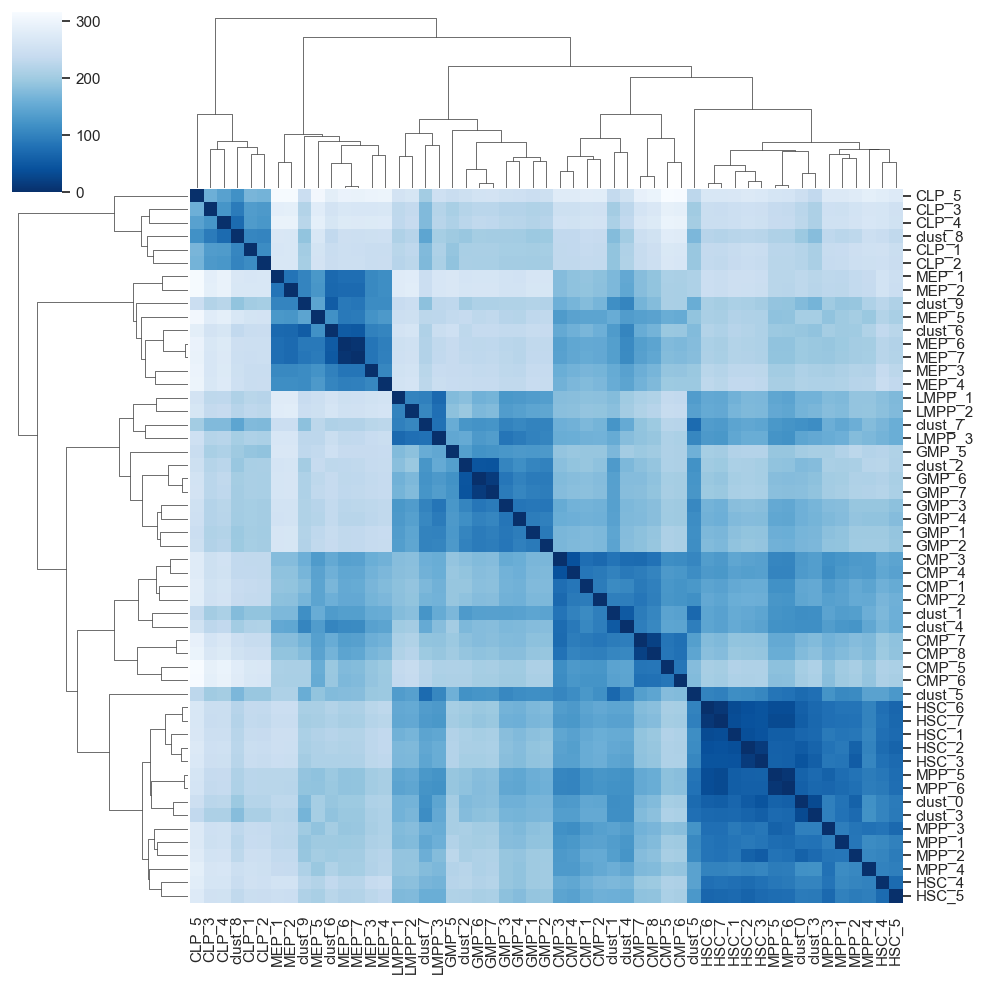

In [69]:
heatmap = scATAcat.plot_pca_dist_heatmap(result[1],result[2])

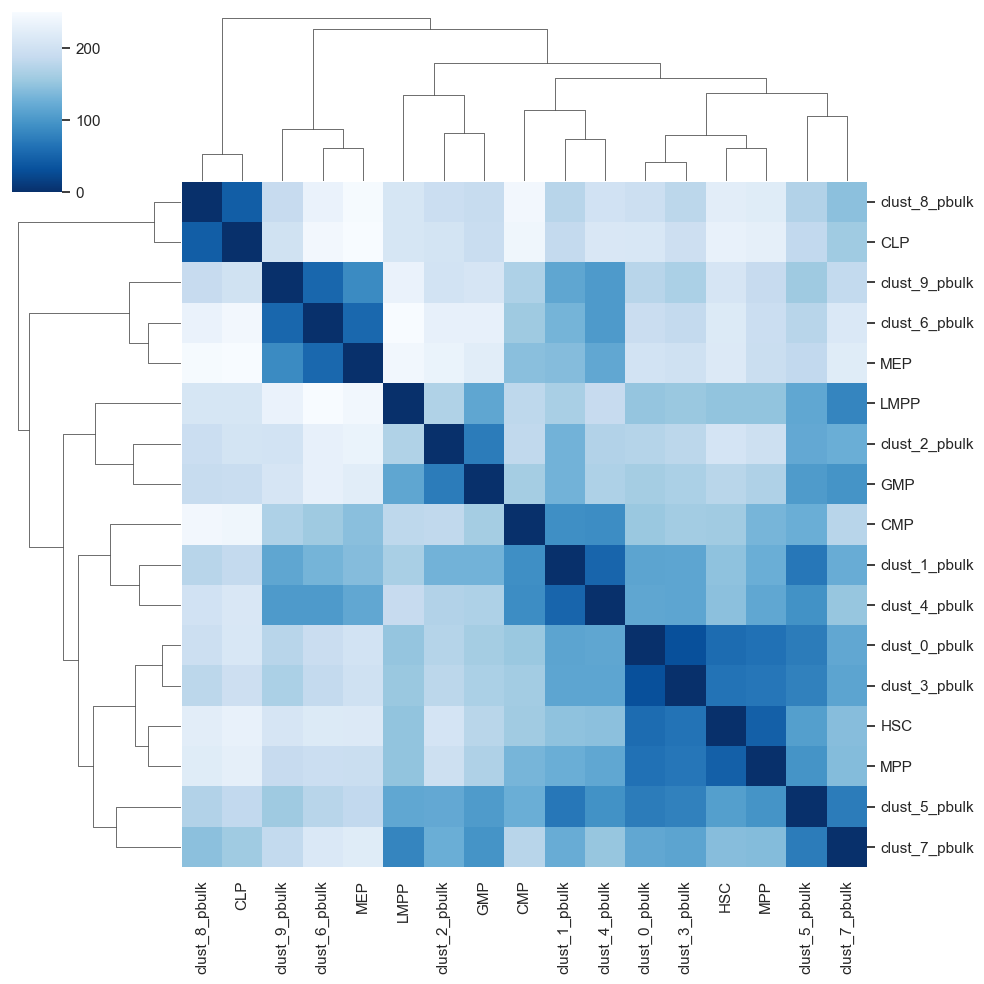

In [70]:
centroid_heatmap =  scATAcat.plot_pca_dist_cent_heatmap(result[1],result[2])


In [71]:
heatmap[0].savefig(figures_dir +"/heatmap.png") 
centroid_heatmap[0].savefig(figures_dir +"/centroid_heatmap.png") 


In [72]:
scATAcat.get_closest_prototype_to_pseudobulk(centroid_heatmap[1])

{'clust_0_pbulk': 'HSC',
 'clust_1_pbulk': 'CMP',
 'clust_2_pbulk': 'GMP',
 'clust_3_pbulk': 'HSC',
 'clust_4_pbulk': 'CMP',
 'clust_5_pbulk': 'MPP',
 'clust_6_pbulk': 'MEP',
 'clust_7_pbulk': 'LMPP',
 'clust_8_pbulk': 'CLP',
 'clust_9_pbulk': 'MEP'}

In [73]:
clusterID_prediction_dict = scATAcat.get_closest_prototype_to_pseudobulk(centroid_heatmap[1])
clusterID_prediction_dict

{'clust_0_pbulk': 'HSC',
 'clust_1_pbulk': 'CMP',
 'clust_2_pbulk': 'GMP',
 'clust_3_pbulk': 'HSC',
 'clust_4_pbulk': 'CMP',
 'clust_5_pbulk': 'MPP',
 'clust_6_pbulk': 'MEP',
 'clust_7_pbulk': 'LMPP',
 'clust_8_pbulk': 'CLP',
 'clust_9_pbulk': 'MEP'}

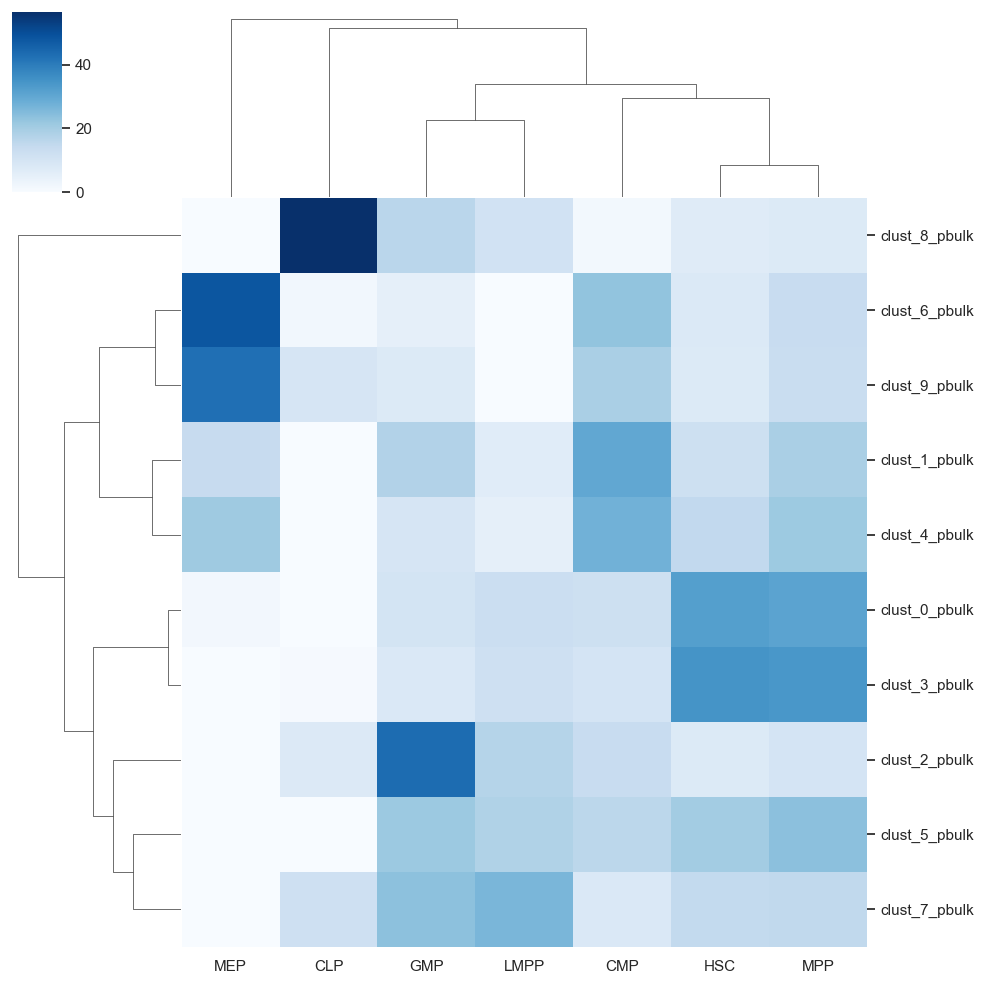

In [74]:
cluster_to_pseudobulk_heatmap_plot = sns.clustermap(scATAcat.get_pseudobulk_to_prototype_distance(centroid_heatmap[1], pbulk_to_prototype=True).T,yticklabels=True,xticklabels=True, cmap="Blues")

In [75]:
cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.png") 


In [76]:
cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.svg") 


In [77]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

cluster_to_pseudobulk_heatmap_plot.savefig(figures_dir+"/cluster_to_pseudobulk_heatmap_plot.svg") 


### 15- Post hoc analysis

In [78]:
cell_cluster_assignments_with_predictions = copy.deepcopy(cell_cluster_assignments)

#### match the clusterID with predicted cell type

In [79]:
# convert the cell id column to character 
cell_cluster_assignments_with_predictions[leiden_key] = cell_cluster_assignments_with_predictions[leiden_key].astype(str)

In [80]:
cell_cluster_assignments_with_predictions.head()

leiden_1.0
CLP_1          8
CMP_0          4
CMP_1          4
CMP_2          1
CMP_3          6

In [81]:
# refortmat the dict suct that it mactes the clust ID col
clusterID_prediction_dict_edited = dict((''.join(filter(str.isdigit, key)), value) for (key, value) in clusterID_prediction_dict.items())
clusterID_prediction_dict_edited

{'0': 'HSC',
 '1': 'CMP',
 '2': 'GMP',
 '3': 'HSC',
 '4': 'CMP',
 '5': 'MPP',
 '6': 'MEP',
 '7': 'LMPP',
 '8': 'CLP',
 '9': 'MEP'}

In [82]:
cell_cluster_assignments_with_predictions['scATAcat_annotation'] = cell_cluster_assignments_with_predictions[leiden_key].map(clusterID_prediction_dict_edited)

In [83]:
cell_cluster_assignments_with_predictions["ground_truth_annotation"] = [i.split("_")[0] for i in cell_cluster_assignments_with_predictions.index]
cell_cluster_assignments_with_predictions

leiden_1.0 scATAcat_annotation ground_truth_annotation
CLP_1            8                 CLP                     CLP
CMP_0            4                 CMP                     CMP
CMP_1            4                 CMP                     CMP
CMP_2            1                 CMP                     CMP
CMP_3            6                 MEP                     CMP
...            ...                 ...                     ...
LMPP_90          7                LMPP                    LMPP
LMPP_91          7                LMPP                    LMPP
LMPP_93          7                LMPP                    LMPP
LMPP_94          7                LMPP                    LMPP
LMPP_95          7                LMPP                    LMPP

[1872 rows x 3 columns]

In [84]:
cell_cluster_assignments_with_predictions.to_csv(output_dir +"/scATAcat_annotations.csv")

### 15- Post hoc analysis

In [85]:
cell_cluster_assignments_with_predictions = copy.deepcopy(cell_cluster_assignments)

#### match the clusterID with predicted cell type

In [86]:
# convert the cell id column to character 
cell_cluster_assignments_with_predictions[leiden_key] = cell_cluster_assignments_with_predictions[leiden_key].astype(str)

In [87]:
cell_cluster_assignments_with_predictions.head()

leiden_1.0
CLP_1          8
CMP_0          4
CMP_1          4
CMP_2          1
CMP_3          6

In [88]:
# refortmat the dict suct that it mactes the clust ID col
clusterID_prediction_dict_edited = dict((''.join(filter(str.isdigit, key)), value) for (key, value) in clusterID_prediction_dict.items())
clusterID_prediction_dict_edited

{'0': 'HSC',
 '1': 'CMP',
 '2': 'GMP',
 '3': 'HSC',
 '4': 'CMP',
 '5': 'MPP',
 '6': 'MEP',
 '7': 'LMPP',
 '8': 'CLP',
 '9': 'MEP'}

In [89]:
cell_cluster_assignments_with_predictions['scATAcat_annotation'] = cell_cluster_assignments_with_predictions[leiden_key].map(clusterID_prediction_dict_edited)

In [90]:
cell_cluster_assignments_with_predictions["ground_truth_annotation"] = [i.split("_")[0] for i in cell_cluster_assignments_with_predictions.index]
cell_cluster_assignments_with_predictions

leiden_1.0 scATAcat_annotation ground_truth_annotation
CLP_1            8                 CLP                     CLP
CMP_0            4                 CMP                     CMP
CMP_1            4                 CMP                     CMP
CMP_2            1                 CMP                     CMP
CMP_3            6                 MEP                     CMP
...            ...                 ...                     ...
LMPP_90          7                LMPP                    LMPP
LMPP_91          7                LMPP                    LMPP
LMPP_93          7                LMPP                    LMPP
LMPP_94          7                LMPP                    LMPP
LMPP_95          7                LMPP                    LMPP

[1872 rows x 3 columns]

In [91]:
cell_cluster_assignments_with_predictions[cell_cluster_assignments_with_predictions.scATAcat_annotation == cell_cluster_assignments_with_predictions.ground_truth_annotation]

leiden_1.0 scATAcat_annotation ground_truth_annotation
CLP_1            8                 CLP                     CLP
CMP_0            4                 CMP                     CMP
CMP_1            4                 CMP                     CMP
CMP_2            1                 CMP                     CMP
CMP_5            4                 CMP                     CMP
...            ...                 ...                     ...
LMPP_90          7                LMPP                    LMPP
LMPP_91          7                LMPP                    LMPP
LMPP_93          7                LMPP                    LMPP
LMPP_94          7                LMPP                    LMPP
LMPP_95          7                LMPP                    LMPP

[1388 rows x 3 columns]

In [92]:
cell_cluster_assignments_with_predictions.to_csv(output_dir +"/scATAcat_annotations.csv")

In [93]:
## 16 - visualize the annotations in UMAP 

In [94]:
set(sc_commonDiffFeatures_adata.obs.cell_type)

{'CLP', 'CMP', 'GMP', 'HSC', 'LMPP', 'MEP', 'MPP'}

In [95]:
 clusterID_prediction_dict_edited.values()

dict_values(['HSC', 'CMP', 'GMP', 'HSC', 'CMP', 'MPP', 'MEP', 'LMPP', 'CLP', 'MEP'])

In [96]:
## add cell identities of the scATAcat-predicted and ground-truth cells to adata.obs
for cell_type in sorted(set(cell_cluster_assignments_with_predictions.scATAcat_annotation)):
    colname = "scATAcat_predicted_" + cell_type 
    clust = list(clusterID_prediction_dict_edited.keys())[list(clusterID_prediction_dict_edited.values()).index(cell_type)]
    sc_commonDiffFeatures_adata.obs[colname] = pd.Categorical(np.where((sc_commonDiffFeatures_adata.obs[leiden_key]==clust), cell_type+"s", "others")) 

In [97]:
sc_commonDiffFeatures_adata.obs.columns

Index(['cell_IDs', 'leiden_1.0', 'cell_type', 'num_feature_per_cell_',
       'scATAcat_predicted_CLP', 'scATAcat_predicted_CMP',
       'scATAcat_predicted_GMP', 'scATAcat_predicted_HSC',
       'scATAcat_predicted_LMPP', 'scATAcat_predicted_MEP',
       'scATAcat_predicted_MPP'],
      dtype='object')

In [98]:
if not os.path.exists(figures_dir+'/UMAPs/'):
    os.makedirs(figures_dir+'/UMAPs/')


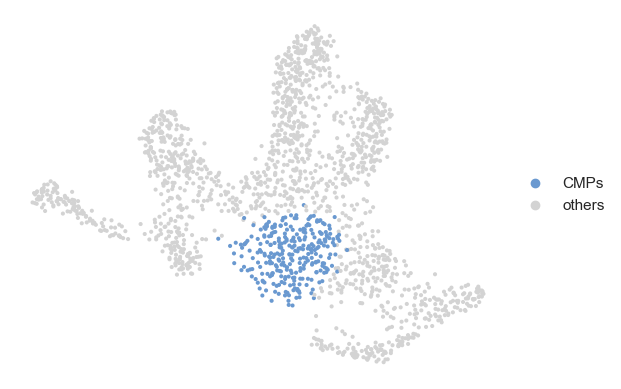

In [99]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='scATAcat_predicted_CMP', palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir+"/UMAPs/scATAcat_predicted_CMPs.pdf", bbox_inches="tight")

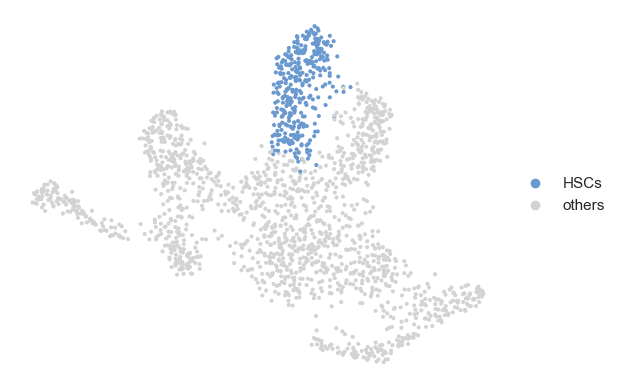

In [100]:
with plt.rc_context():
    sc.pl.umap(sc_commonDiffFeatures_adata, color='scATAcat_predicted_HSC', palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir+"/UMAPs/scATAcat_predicted_HSCs.pdf", bbox_inches="tight")

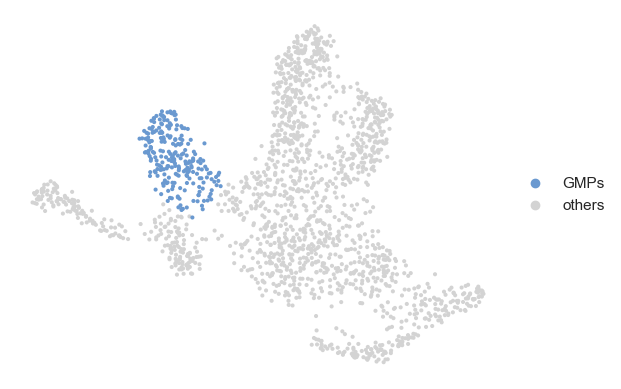

In [101]:
with plt.rc_context():  # Use this to set figure params like size and dpi
    sc.pl.umap(sc_commonDiffFeatures_adata, color='scATAcat_predicted_GMP', palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False, title="")
    #sc.pl.plotting_function(..., show=False)
    plt.savefig(figures_dir+"/UMAPs/scATAcat_predicted_GMPs.pdf", bbox_inches="tight")

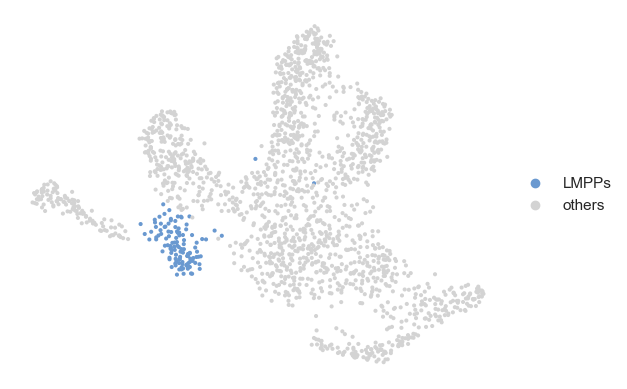

In [102]:
with plt.rc_context():  
    sc.pl.umap(sc_commonDiffFeatures_adata, color='scATAcat_predicted_LMPP', palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir+"/UMAPs/scATAcat_predicted_LMPPs.pdf", bbox_inches="tight")

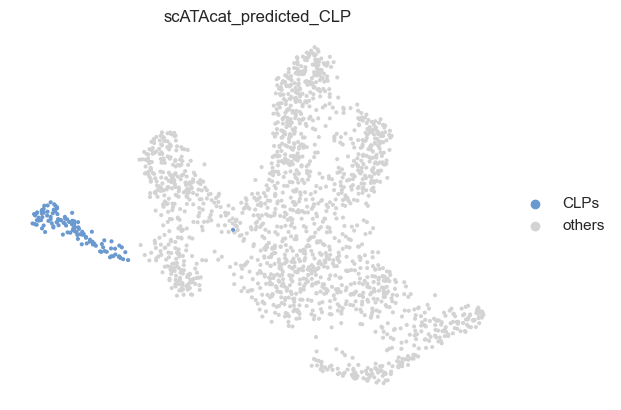

In [103]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='scATAcat_predicted_CLP', palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False)
    plt.savefig(figures_dir+"/UMAPs/scATAcat_predicted_CLPs.pdf", bbox_inches="tight")

In [104]:
## compare these projections with the ground truth

In [105]:
clusterID_prediction_dict_edited.values()

dict_values(['HSC', 'CMP', 'GMP', 'HSC', 'CMP', 'MPP', 'MEP', 'LMPP', 'CLP', 'MEP'])

In [106]:
## add cell types labels of the ground-truth identities to adata.obs
for cell_type in sorted(set(cell_cluster_assignments_with_predictions.ground_truth_annotation)):
    colname =  "groundTruth_" + cell_type
    sc_commonDiffFeatures_adata.obs[colname] = pd.Categorical(np.where((sc_commonDiffFeatures_adata.obs['cell_type']==cell_type), cell_type+"s", "others")) 

In [107]:
sc_commonDiffFeatures_adata.obs.columns

Index(['cell_IDs', 'leiden_1.0', 'cell_type', 'num_feature_per_cell_',
       'scATAcat_predicted_CLP', 'scATAcat_predicted_CMP',
       'scATAcat_predicted_GMP', 'scATAcat_predicted_HSC',
       'scATAcat_predicted_LMPP', 'scATAcat_predicted_MEP',
       'scATAcat_predicted_MPP', 'groundTruth_CLP', 'groundTruth_CMP',
       'groundTruth_GMP', 'groundTruth_HSC', 'groundTruth_LMPP',
       'groundTruth_MEP', 'groundTruth_MPP'],
      dtype='object')

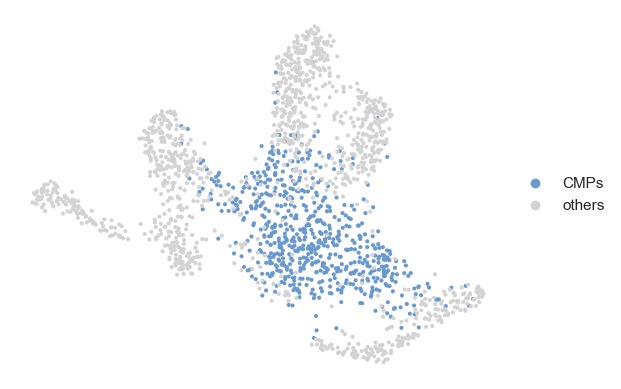

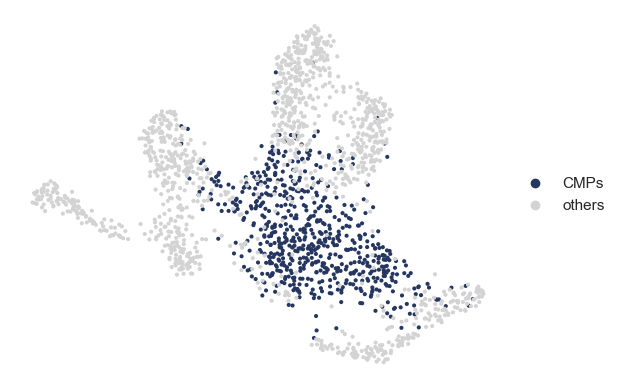

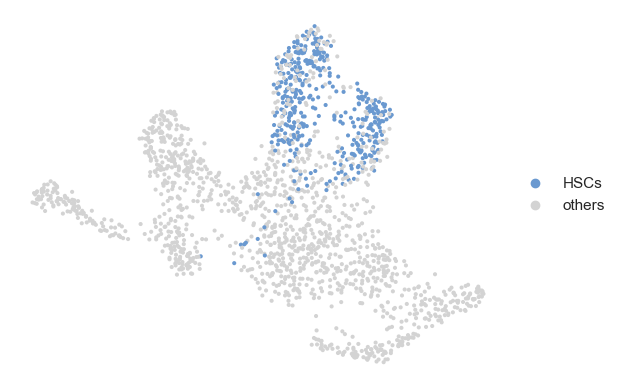

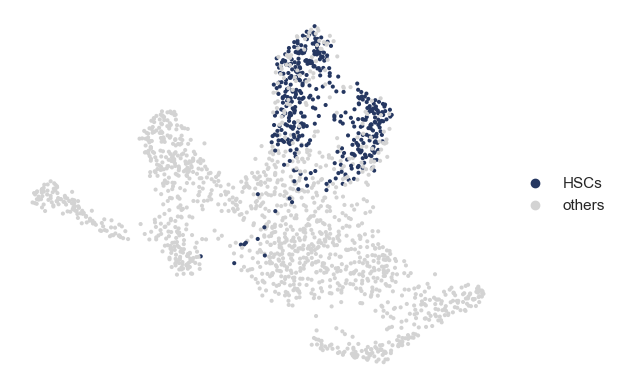

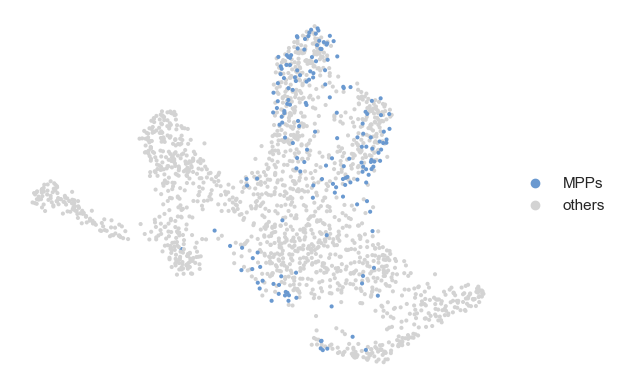

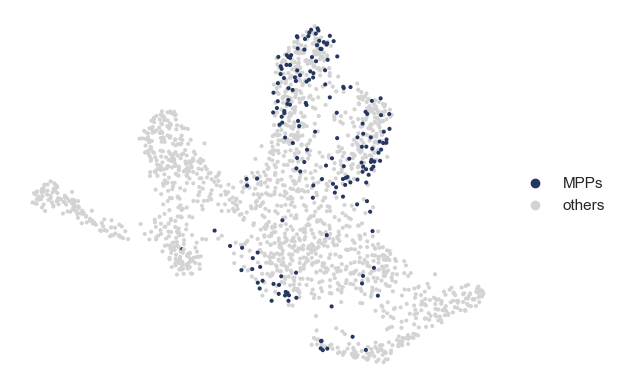

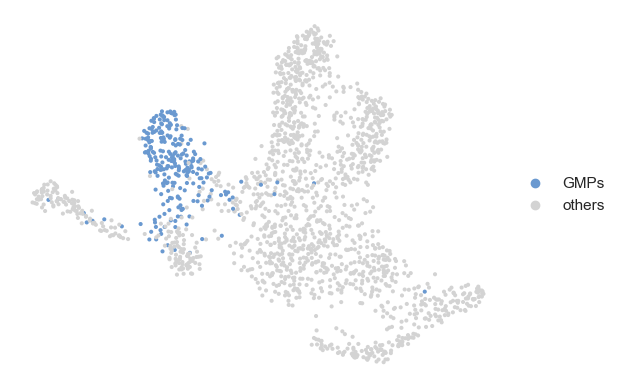

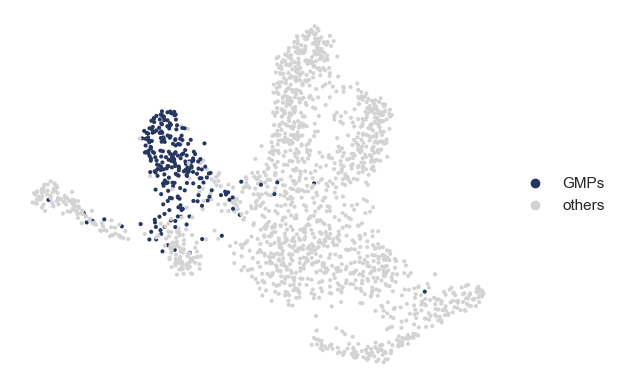

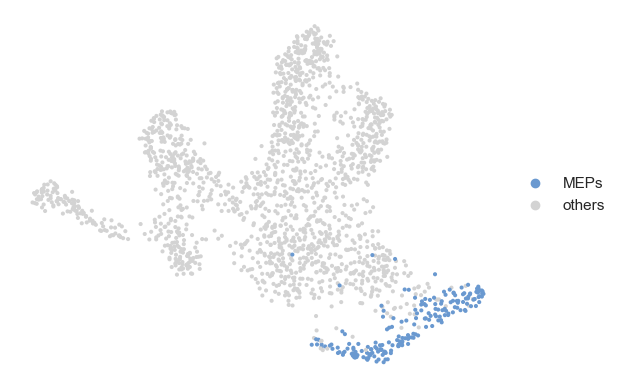

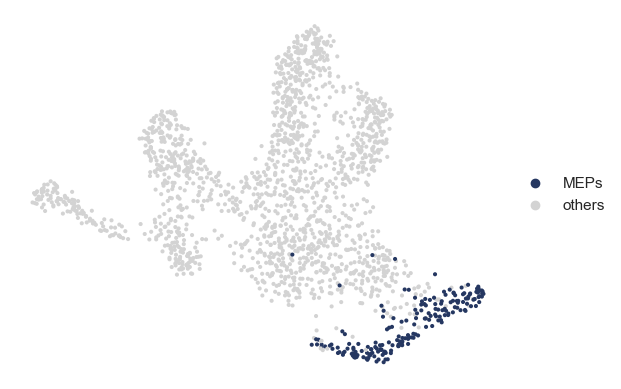

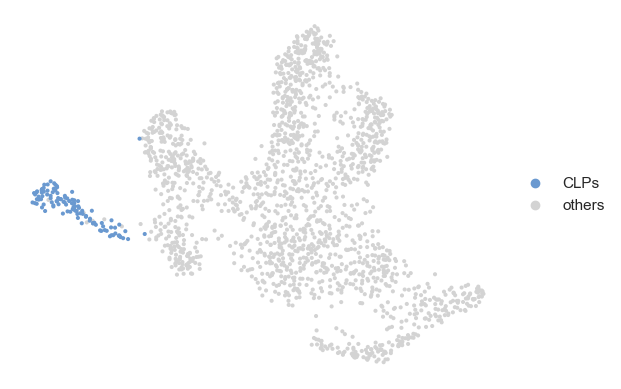

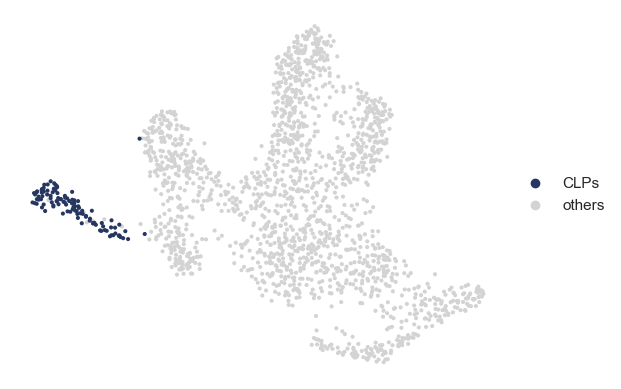

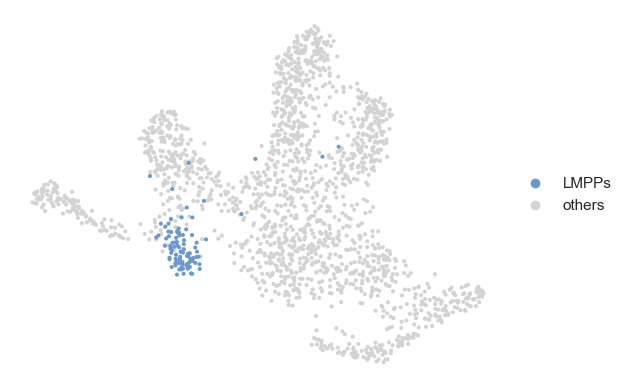

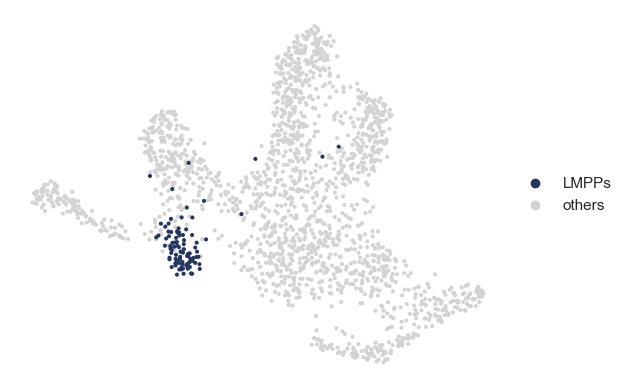

In [108]:
for labels in ['groundTruth_CMP', 'groundTruth_HSC','groundTruth_MPP', 'groundTruth_GMP', 'groundTruth_MEP','groundTruth_CLP', 'groundTruth_LMPP']:
    savename="UMAPs/"+labels+".pdf"
    savename_darker_color="UMAPs/"+labels+"_darker_color.pdf"
    with plt.rc_context(): 
        sc.pl.umap(sc_commonDiffFeatures_adata, color=labels, palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False,title="")
        plt.savefig(figures_dir+savename, bbox_inches="tight")
    with plt.rc_context(): 
        sc.pl.umap(sc_commonDiffFeatures_adata, color=labels, palette=['#253761','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False,title="")
        plt.savefig(figures_dir+savename_darker_color, bbox_inches="tight")

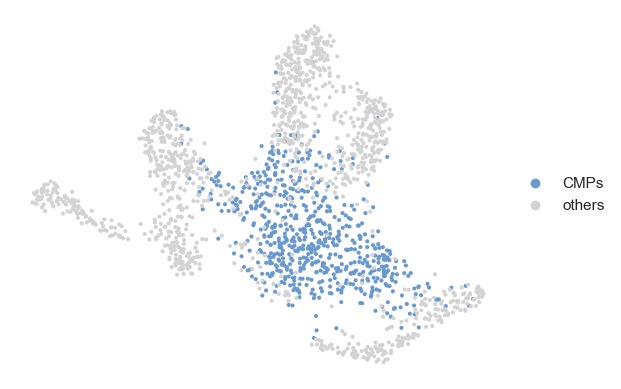

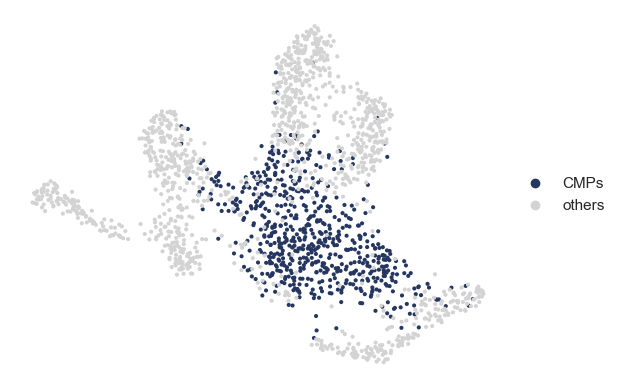

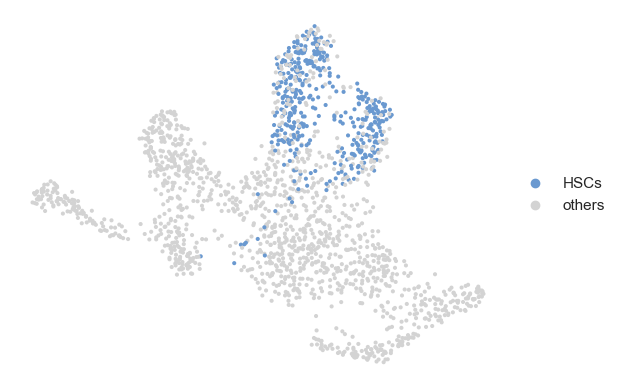

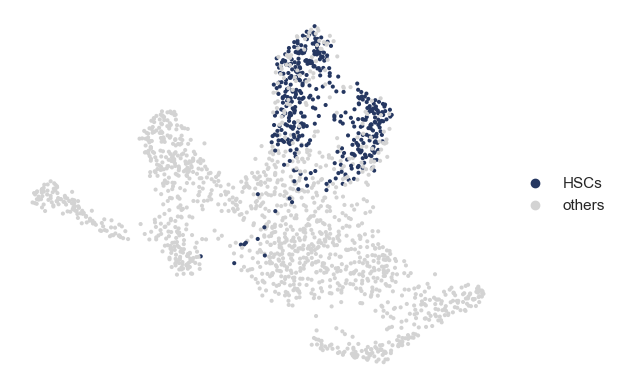

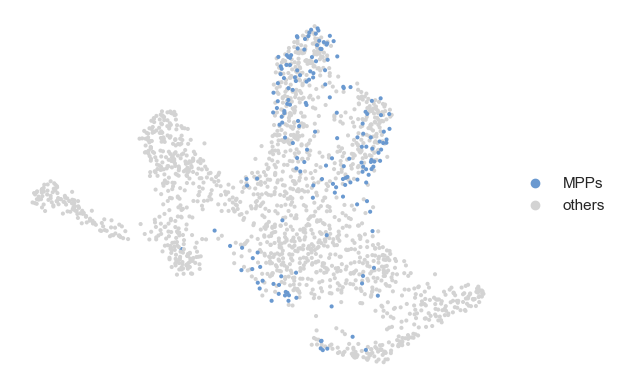

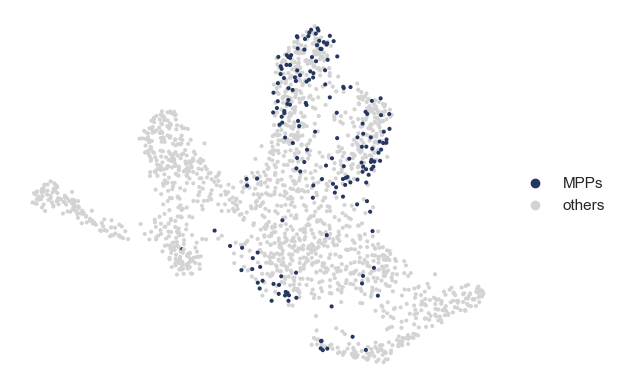

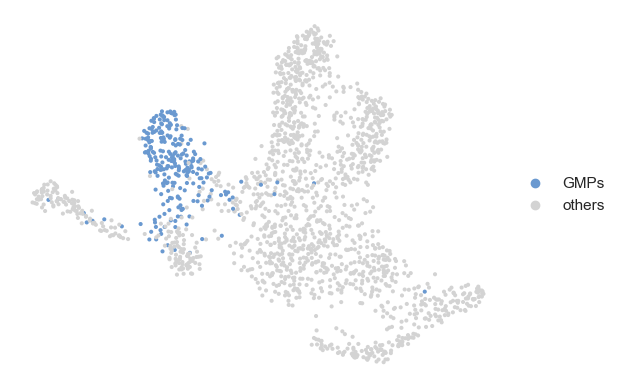

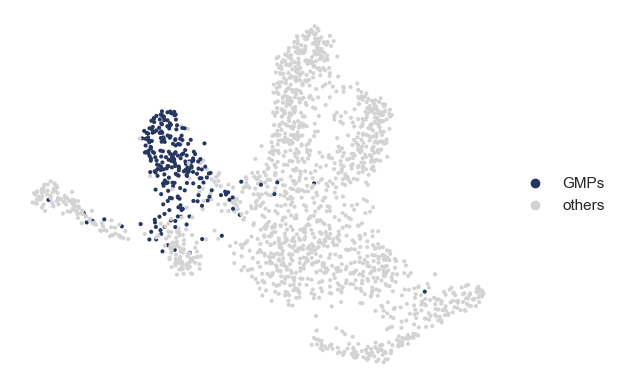

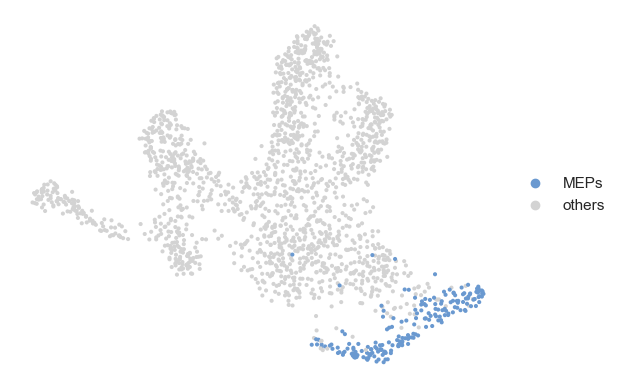

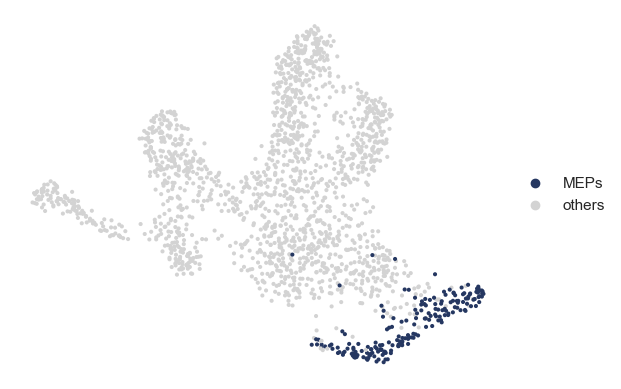

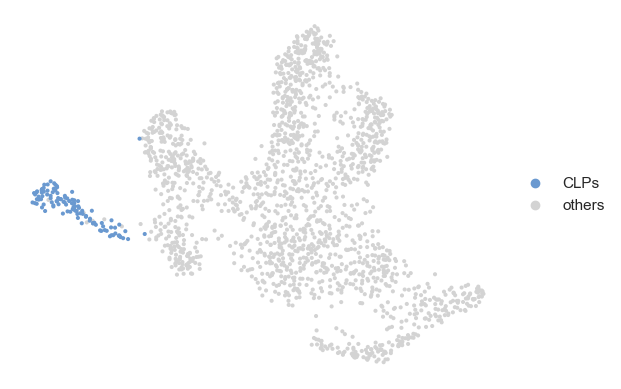

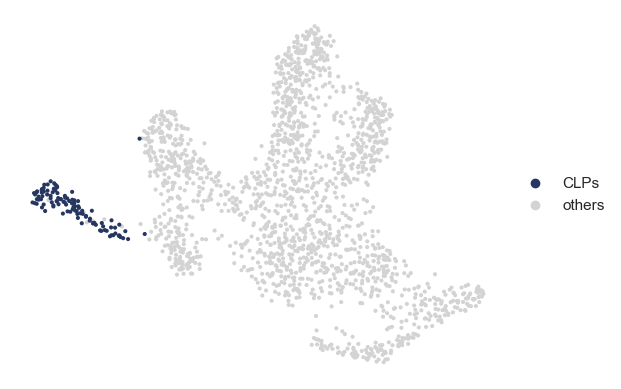

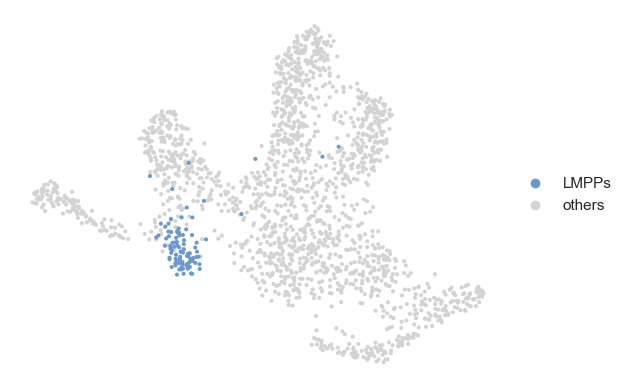

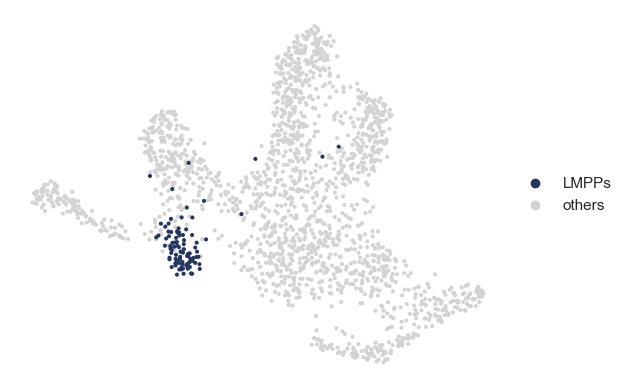

In [109]:
for labels in ['groundTruth_CMP', 'groundTruth_HSC','groundTruth_MPP', 'groundTruth_GMP', 'groundTruth_MEP','groundTruth_CLP', 'groundTruth_LMPP']:
    savename="UMAPs/png/"+labels+".png"
    if not os.path.exists(figures_dir+'UMAPs/png/'):
        os.makedirs(figures_dir+'UMAPs/png/')
    savename_darker_color="UMAPs/png/"+labels+"_darker_color.png"
    with plt.rc_context(): 
        sc.pl.umap(sc_commonDiffFeatures_adata, color=labels, palette=['#6A99D0','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False,title="")
        plt.savefig(figures_dir+savename, bbox_inches="tight")
    with plt.rc_context(): 
        sc.pl.umap(sc_commonDiffFeatures_adata, color=labels, palette=['#253761','lightgrey' ], show=False,size=35 , add_outline=False, frameon=False,title="")
        plt.savefig(figures_dir+savename_darker_color, bbox_inches="tight")

## export AnnData object

In [110]:

with open(output_dir +'/sc_commonDiffFeatures_adata.pkl', 'wb') as f:
    pickle.dump(sc_commonDiffFeatures_adata, f)

In [111]:
cell_cluster_assignments.to_csv(output_dir +"cell_cluster_assignments.csv")